In [53]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import sys
import os
sys.path.append(os.path.abspath('/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main'))
from src import preprocessing

In [54]:
source = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/Updated_Obesity_Dataset.csv")

Categorical features handling

In [55]:
source["Gender"] = source["Gender"].map({"Male" : 0, "Female" : 1})
source["CALC"] = source["CALC"].map({"no" : 0, "Always" : 1, "Sometimes": 0.25, "Frequently": 0.75})
source["FAVC"] = source["FAVC"].map({"no" : 0, "yes" : 1})
source["SCC"] = source["SCC"].map({"no" : 0, "yes" : 1})
source["SMOKE"] = source["SMOKE"].map({"no" : 0, "yes" : 1})
source["family_history_with_overweight"] = source["family_history_with_overweight"].map({"yes": 1, "no": 0})
source["CAEC"] = source["CAEC"].map({"no" : 0, "Always" : 1, "Sometimes": 0.25, "Frequently": 0.75})
source["NObeyesdad"] = source["NObeyesdad"].map({"Normal_Weight" : 1, "Insufficient_Weight": 0, 
                                                 "Overweight_Level_I" : 2, "Overweight_Level_II": 3,
                                                 "Obesity_Type_I": 4, "Obesity_Type_II": 5,
                                                 "Obesity_Type_III": 6})
source.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,1.0,1.62,64.0,0.00,0,2.0,3.0,0,0,2.0,1.0,0.0,1.0,0.25,Public_Transportation,1
1,21.0,1.0,1.52,56.0,0.25,0,3.0,3.0,1,1,3.0,1.0,3.0,0.0,0.25,Public_Transportation,1
2,23.0,0.0,1.80,77.0,0.75,0,2.0,3.0,0,0,2.0,1.0,2.0,1.0,0.25,Public_Transportation,1
3,27.0,0.0,1.80,87.0,0.75,0,3.0,3.0,0,0,2.0,0.0,2.0,0.0,0.25,Walking,2
4,22.0,0.0,1.78,89.8,0.25,0,2.0,1.0,0,0,2.0,0.0,0.0,0.0,0.25,Public_Transportation,3


In [56]:
category_enc = pd.get_dummies(source['MTRANS'])
category_enc.head()
source = pd.concat([source.drop('MTRANS', axis=1), category_enc], axis=1)
features = ["Automobile", "Bike", "Motorbike", "Public_Transportation", "Walking"]
for feature in features:
    source[feature] = source[feature].map({False: 0, True: 1})

In [57]:
source

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,21.000000,1.0,1.620000,64.000000,0.00,0,2.0,3.0,0,0,...,1.0,0.000000,1.000000,0.25,1,0,0,0,1,0
1,21.000000,1.0,1.520000,56.000000,0.25,0,3.0,3.0,1,1,...,1.0,3.000000,0.000000,0.25,1,0,0,0,1,0
2,23.000000,0.0,1.800000,77.000000,0.75,0,2.0,3.0,0,0,...,1.0,2.000000,1.000000,0.25,1,0,0,0,1,0
3,27.000000,0.0,1.800000,87.000000,0.75,0,3.0,3.0,0,0,...,0.0,2.000000,0.000000,0.25,2,0,0,0,0,1
4,22.000000,0.0,1.780000,89.800000,0.25,0,2.0,1.0,0,0,...,0.0,0.000000,0.000000,0.25,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.0,1.710730,131.408528,0.25,1,3.0,3.0,0,0,...,1.0,1.676269,0.906247,0.25,6,0,0,0,1,0
2107,21.982942,1.0,1.748584,133.742943,0.25,1,3.0,3.0,0,0,...,1.0,1.341390,0.599270,0.25,6,0,0,0,1,0
2108,22.524036,1.0,1.752206,133.689352,0.25,1,3.0,3.0,0,0,...,1.0,1.414209,0.646288,0.25,6,0,0,0,1,0
2109,24.361936,1.0,1.739450,133.346641,0.25,1,3.0,3.0,0,0,...,1.0,1.139107,0.586035,0.25,6,0,0,0,1,0


NULL Handling:

In [58]:
source.head(4)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,21.0,1.0,1.62,64.0,0.00,0,2.0,3.0,0,0,...,1.0,0.0,1.0,0.25,1,0,0,0,1,0
1,21.0,1.0,1.52,56.0,0.25,0,3.0,3.0,1,1,...,1.0,3.0,0.0,0.25,1,0,0,0,1,0
2,23.0,0.0,1.80,77.0,0.75,0,2.0,3.0,0,0,...,1.0,2.0,1.0,0.25,1,0,0,0,1,0
3,27.0,0.0,1.80,87.0,0.75,0,3.0,3.0,0,0,...,0.0,2.0,0.0,0.25,2,0,0,0,0,1


In [59]:
print(source.shape)
print(source.isnull().sum())

(2111, 21)
Age                                0
Gender                            11
Height                             0
Weight                             0
CALC                               0
FAVC                               0
FCVC                               0
NCP                                0
SCC                                0
SMOKE                              0
CH2O                              21
family_history_with_overweight    21
FAF                                0
TUE                                0
CAEC                               0
NObeyesdad                         0
Automobile                         0
Bike                               0
Motorbike                          0
Public_Transportation              0
Walking                            0
dtype: int64


In [60]:
row_nulls = source.isnull().sum(axis = 1)
rows_with_nulls = row_nulls[row_nulls > 0]
for idx, count in rows_with_nulls.items():
    print(f"Row {idx} → {count} null(s)")

Row 48 → 1 null(s)
Row 70 → 1 null(s)
Row 71 → 1 null(s)
Row 125 → 1 null(s)
Row 143 → 1 null(s)
Row 157 → 1 null(s)
Row 196 → 1 null(s)
Row 205 → 1 null(s)
Row 263 → 1 null(s)
Row 274 → 1 null(s)
Row 281 → 1 null(s)
Row 284 → 1 null(s)
Row 314 → 1 null(s)
Row 324 → 1 null(s)
Row 330 → 1 null(s)
Row 420 → 1 null(s)
Row 463 → 1 null(s)
Row 501 → 1 null(s)
Row 527 → 1 null(s)
Row 544 → 1 null(s)
Row 603 → 1 null(s)
Row 634 → 1 null(s)
Row 722 → 1 null(s)
Row 730 → 1 null(s)
Row 744 → 1 null(s)
Row 792 → 1 null(s)
Row 932 → 1 null(s)
Row 965 → 1 null(s)
Row 995 → 1 null(s)
Row 1040 → 1 null(s)
Row 1178 → 1 null(s)
Row 1241 → 1 null(s)
Row 1257 → 1 null(s)
Row 1411 → 1 null(s)
Row 1442 → 1 null(s)
Row 1444 → 1 null(s)
Row 1449 → 1 null(s)
Row 1450 → 1 null(s)
Row 1454 → 1 null(s)
Row 1483 → 1 null(s)
Row 1561 → 1 null(s)
Row 1563 → 1 null(s)
Row 1582 → 1 null(s)
Row 1635 → 1 null(s)
Row 1656 → 1 null(s)
Row 1673 → 1 null(s)
Row 1812 → 1 null(s)
Row 1831 → 1 null(s)
Row 1916 → 1 null(s)
Row

No row/column had to be dropped ^

NULL Transform

In [61]:
print(source.isnull().sum())

Age                                0
Gender                            11
Height                             0
Weight                             0
CALC                               0
FAVC                               0
FCVC                               0
NCP                                0
SCC                                0
SMOKE                              0
CH2O                              21
family_history_with_overweight    21
FAF                                0
TUE                                0
CAEC                               0
NObeyesdad                         0
Automobile                         0
Bike                               0
Motorbike                          0
Public_Transportation              0
Walking                            0
dtype: int64


In [62]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy = "median")
mode_imputer = SimpleImputer(strategy = "most_frequent")

source[["CH2O"]] = median_imputer.fit_transform(source[["CH2O"]])
source[["Gender", "family_history_with_overweight"]] = mode_imputer.fit_transform(source[["Gender", "family_history_with_overweight"]])


In [63]:
print(source.isnull().sum())

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
NObeyesdad                        0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
dtype: int64


Took Median value for NULL values in CH2O column and Mode value for NULL values in Gender and family_history_with_overweight colms ^

No Column has to be dropped as all the columns are relevant to the target

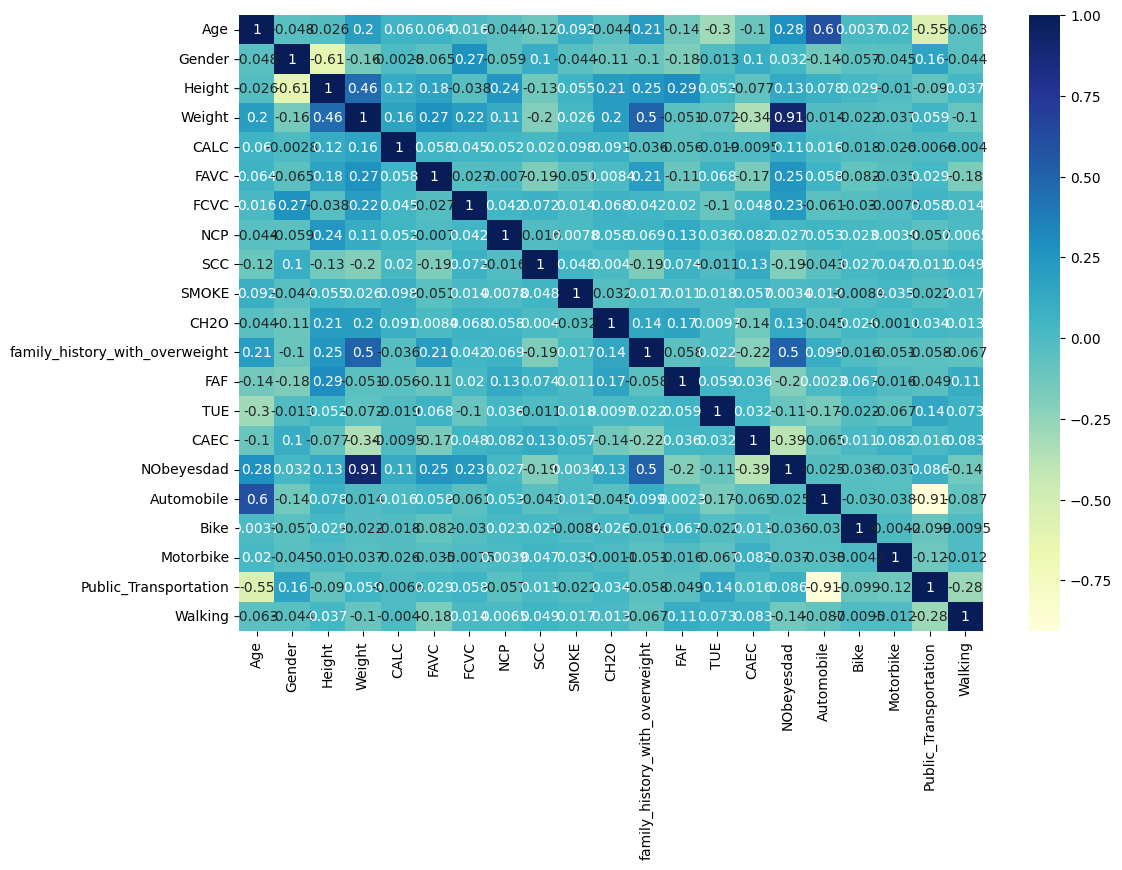

In [64]:
preprocessing.correlation_plot(source)

No notable feature - feature correlation ^

In [65]:
#Export for Split before Normalization
source.to_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/processed_dataset.csv", index = False)
source = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/processed_dataset.csv")
preprocessing.split_dataset(source)

Train set size: (1477, 20)
Test set size: (634, 20)
